In [2]:
#import dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import linregress
from datetime import datetime

In [3]:
#Read in data
#Read in data into Dataframes
store_df = pd.read_csv("Resources/store.csv")
train_df = pd.read_csv("Resources/train.csv")

C:\Users\Beaut\AppData\Local\Temp\ipykernel_7640\2539948984.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("Resources/train.csv")


In [4]:
#show the first 5 rows of the store dataframe
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
#show the first 5 rows of the train dataframe
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
#Look at the shape of each dataframe
store_df.shape, train_df.shape

((1115, 10), (1017209, 9))

In [7]:
#Identify duplicate value counts
store_df.duplicated().sum(), train_df.duplicated().sum()

(0, 0)

In [8]:
#Look at the information of the store dataframe
# observations - 3 categorical variables (StoreType, Assortment, PromoInterval)
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
#Look at the information of the train dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
#See the summary statistics
# observations - there are 1115 stores. The competition distance has a wide range, with the min 20 and the maximum being 75860.

store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [11]:
#See the summary statisticsfor the train_df
# observations - the dataset contains over 1 million records. Sales range between 0 - 41,551. 
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
# identifying missing values in the store dataframe
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
# identifying missing values in the train dataframe
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

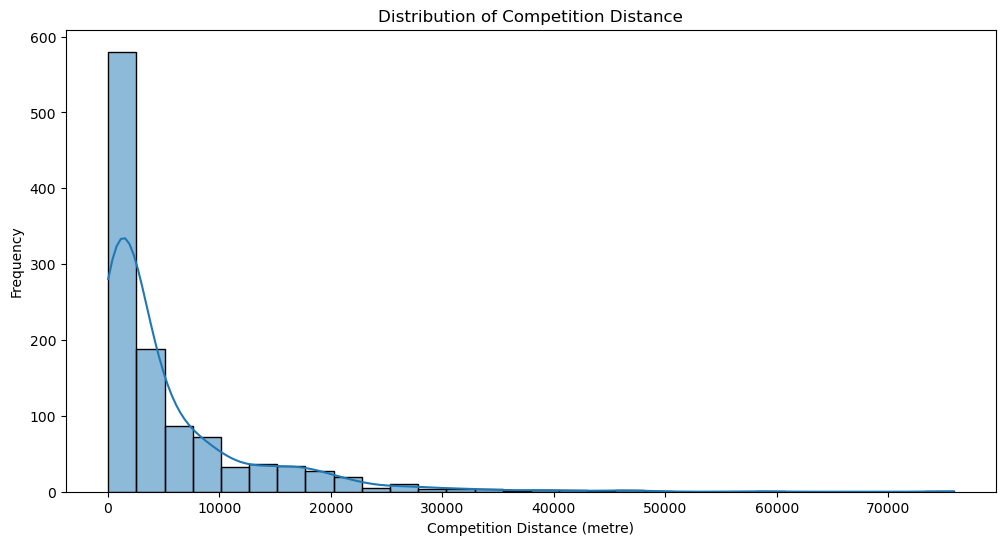

In [14]:
#First, visualise the competition distance to decide whether the 
#mean or median would be best to handle the missing value since it's just 3

# Visualizing the distribution of 'CompetitionDistance'
plt.figure(figsize=(12, 6))
sns.histplot(store_df['CompetitionDistance'], bins=30, kde=True)
plt.title('Distribution of Competition Distance')
plt.xlabel('Competition Distance (metre)')
plt.ylabel('Frequency')
plt.show()

In [15]:
#For competition distance, fill missing values with the median values since it is right skewed

competition_distance_median = store_df['CompetitionDistance'].median()

store_df['CompetitionDistance'].fillna(competition_distance_median, inplace=True)

store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [16]:
# Fill in the null with Mode

# filling null values of CompetitionOpenSinceMonth
store_df["CompetitionOpenSinceMonth"].fillna(store_df["CompetitionOpenSinceMonth"].mode()[0], inplace=True)

# filling null values of CompetitionOpenSinceYear
store_df["CompetitionOpenSinceYear"].fillna(store_df["CompetitionOpenSinceYear"].mode()[0], inplace=True)

In [17]:
# confirm that there are no missing values for CompetitionOpenSinceMonth/Year
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [18]:
# Fill missing values in 'Promo2SinceWeek' and 'Promo2SinceYear' with 0 
# indicating that those stores did not take part in promo2 sales.
#They are filled with 0 because they are numerical datatype.
# Fill missing values in 'PromoInterval' with "0".
# This column is filled with string because it is categorical column.

store_df['Promo2SinceWeek'].fillna(0, inplace=True)

store_df['Promo2SinceYear'].fillna(0, inplace=True)

store_df['PromoInterval'].fillna(0, inplace=True)

store_df.isnull().sum()


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [19]:
# Merge the train_df and store_df datasets on the 'Store' column
merged_df = pd.merge(train_df, store_df, on='Store', how='inner')

# Display the initial few rows of the merged dataset
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [20]:
#See the merged data info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [21]:
# convert dtypes of some columns
merged_df["CompetitionDistance"]= merged_df["CompetitionDistance"].astype(int)
merged_df["CompetitionOpenSinceMonth"]= merged_df["CompetitionOpenSinceMonth"].astype(int)
merged_df["CompetitionOpenSinceYear"]= merged_df["CompetitionOpenSinceYear"].astype(int)
merged_df["Promo2SinceWeek"]= merged_df["Promo2SinceWeek"].astype(int)
merged_df["Promo2SinceYear"]= merged_df["Promo2SinceYear"].astype(int)

In [22]:
continous_value_feature= ["DayOfWeek", "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]

In [23]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

In [24]:
# Determining IQR, Lower and Upper bound and number of outliers present in each of the continous numerical feature
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(merged_df[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:4.0, q3:6.0
Lower bound: -4.0, Upper bound: 12.0, IQR: 4.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 26694
Total percentage of outlier is: 2.62 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 38095
Total percentage of outlier is: 3.75 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 99160
Total percentage of outlier is: 9.75 %


CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 12452
Total percentage of outlier is: 1.22 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 27

In [25]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [26]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continous_value_feature:
  merged_df[feature]= treat_outliers_iqr(merged_df[feature])

In [27]:
# Rechecking the total number of outliers and its percentage present in our dataset.
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(merged_df[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:4.0, q3:6.0
Lower bound: -4.0, Upper bound: 12.0, IQR: 4.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 0
Total percentage of 

In [28]:
#show where stores are open
merged_df = merged_df[merged_df['Open'] == 1]

In [202]:
#Creating a copy of the dataframe
new_df = merged_df.copy()

In [203]:
# Dropping "Open" from our dataset
new_df.drop(columns=["Open"], inplace=True)

In [204]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
new_df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)


In [205]:
#view dataframe info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Store                      844392 non-null  int64 
 1   DayOfWeek                  844392 non-null  int64 
 2   Date                       844392 non-null  object
 3   Sales                      844392 non-null  int64 
 4   Customers                  844392 non-null  int64 
 5   Promo                      844392 non-null  int64 
 6   StateHoliday               844392 non-null  int64 
 7   SchoolHoliday              844392 non-null  int64 
 8   StoreType                  844392 non-null  object
 9   Assortment                 844392 non-null  object
 10  CompetitionDistance        844392 non-null  int64 
 11  CompetitionOpenSinceMonth  844392 non-null  int64 
 12  CompetitionOpenSinceYear   844392 non-null  int64 
 13  Promo2                     844392 non-null 

In [206]:
#Extracting the year, week and  day from the date colum
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df["Year"]= new_df["Date"].dt.year
new_df["Week"]= new_df["Date"].dt.week
new_df["Day"]= new_df["Date"].dt.day

new_df.info()

C:\Users\Beaut\AppData\Local\Temp\ipykernel_7640\3910949050.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  new_df["Week"]= new_df["Date"].dt.week


<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  int64         
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  int64         
 11  CompetitionOpenSinceMonth  844392 non-null  int64  

In [207]:
#Handling categorical data

#one-hot encoding categorical data
new_df= pd.get_dummies(new_df, columns=["StoreType", "Assortment", "PromoInterval"], dtype=int, drop_first=True)

#see the daframe info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844392 non-null  int64         
 1   DayOfWeek                       844392 non-null  int64         
 2   Date                            844392 non-null  datetime64[ns]
 3   Sales                           844392 non-null  int64         
 4   Customers                       844392 non-null  int64         
 5   Promo                           844392 non-null  int64         
 6   StateHoliday                    844392 non-null  int64         
 7   SchoolHoliday                   844392 non-null  int64         
 8   CompetitionDistance             844392 non-null  int64         
 9   CompetitionOpenSinceMonth       844392 non-null  int64         
 10  CompetitionOpenSinceYear        844392 non-null  int64 

In [208]:
# deriving new features:
# 1. "CompetitionDuration -> Duration from which two stores are competiting"
# 2. "PromoDuration -> Duration from which the store is involved in promotion"
# 3. "Sales_Lag_1" ->
##    Final values are in Months.

new_df["Month"]= new_df["Date"].dt.month
new_df["CompetitionDuration"]= (new_df["Year"]-new_df["CompetitionOpenSinceYear"])*12 + (new_df["Month"]-new_df["CompetitionOpenSinceMonth"])
new_df["CompetitionDuration"] = new_df["CompetitionDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

# Creating PromoDuration feature
new_df["PromoDuration"]= (new_df["Year"]-new_df["Promo2SinceYear"])*12 + (new_df["Week"]-new_df["Promo2SinceWeek"])*7/30.5
new_df["PromoDuration"] = new_df["PromoDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0) * merged_df["Promo2"]


# Lag features 
new_df['Sales_Lag_1'] = new_df.groupby('Store')['Sales'].shift(1)
new_df['Sales_Lag_2'] = new_df.groupby('Store')['Sales'].shift(2)

# Rolling window features 
new_df['Sales_Rolling_Mean_3'] = new_df.groupby('Store')['Sales'].rolling(window=3).mean().reset_index(0, drop=True)

new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844392 non-null  int64         
 1   DayOfWeek                       844392 non-null  int64         
 2   Date                            844392 non-null  datetime64[ns]
 3   Sales                           844392 non-null  int64         
 4   Customers                       844392 non-null  int64         
 5   Promo                           844392 non-null  int64         
 6   StateHoliday                    844392 non-null  int64         
 7   SchoolHoliday                   844392 non-null  int64         
 8   CompetitionDistance             844392 non-null  int64         
 9   CompetitionOpenSinceMonth       844392 non-null  int64         
 10  CompetitionOpenSinceYear        844392 non-null  int64 

In [209]:
# drop na

new_df.dropna(inplace=True)


In [210]:
# Suppose the two columns are named 'column1' and 'column2'
new_df['Sales_Lag_1'] = new_df['Sales_Lag_1'].astype(int)
new_df['Sales_Lag_2'] = new_df['Sales_Lag_2'].astype(int)
new_df['Sales_Rolling_Mean_3'] =new_df['Sales_Rolling_Mean_3'].astype(int)


In [211]:
#confirm if there are missing values due to creating new features
new_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
Year                              0
Week                              0
Day                               0
StoreType_b                       0
StoreType_c                       0
StoreType_d                       0
Assortment_b                      0
Assortment_c                      0
PromoInterval_Feb,May,Aug,Nov     0
PromoInterval_Jan,Apr,Jul,Oct     0
PromoInterval_Mar,Jun,Sept,Dec    0
Month                             0
CompetitionDuration               0
PromoDuration               

C:\Users\Beaut\AppData\Local\Temp\ipykernel_7640\2430180058.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(round(new_df.corr(),3)), annot=True, square=True, cmap=plt.cm.CMRmap)


<Axes: >

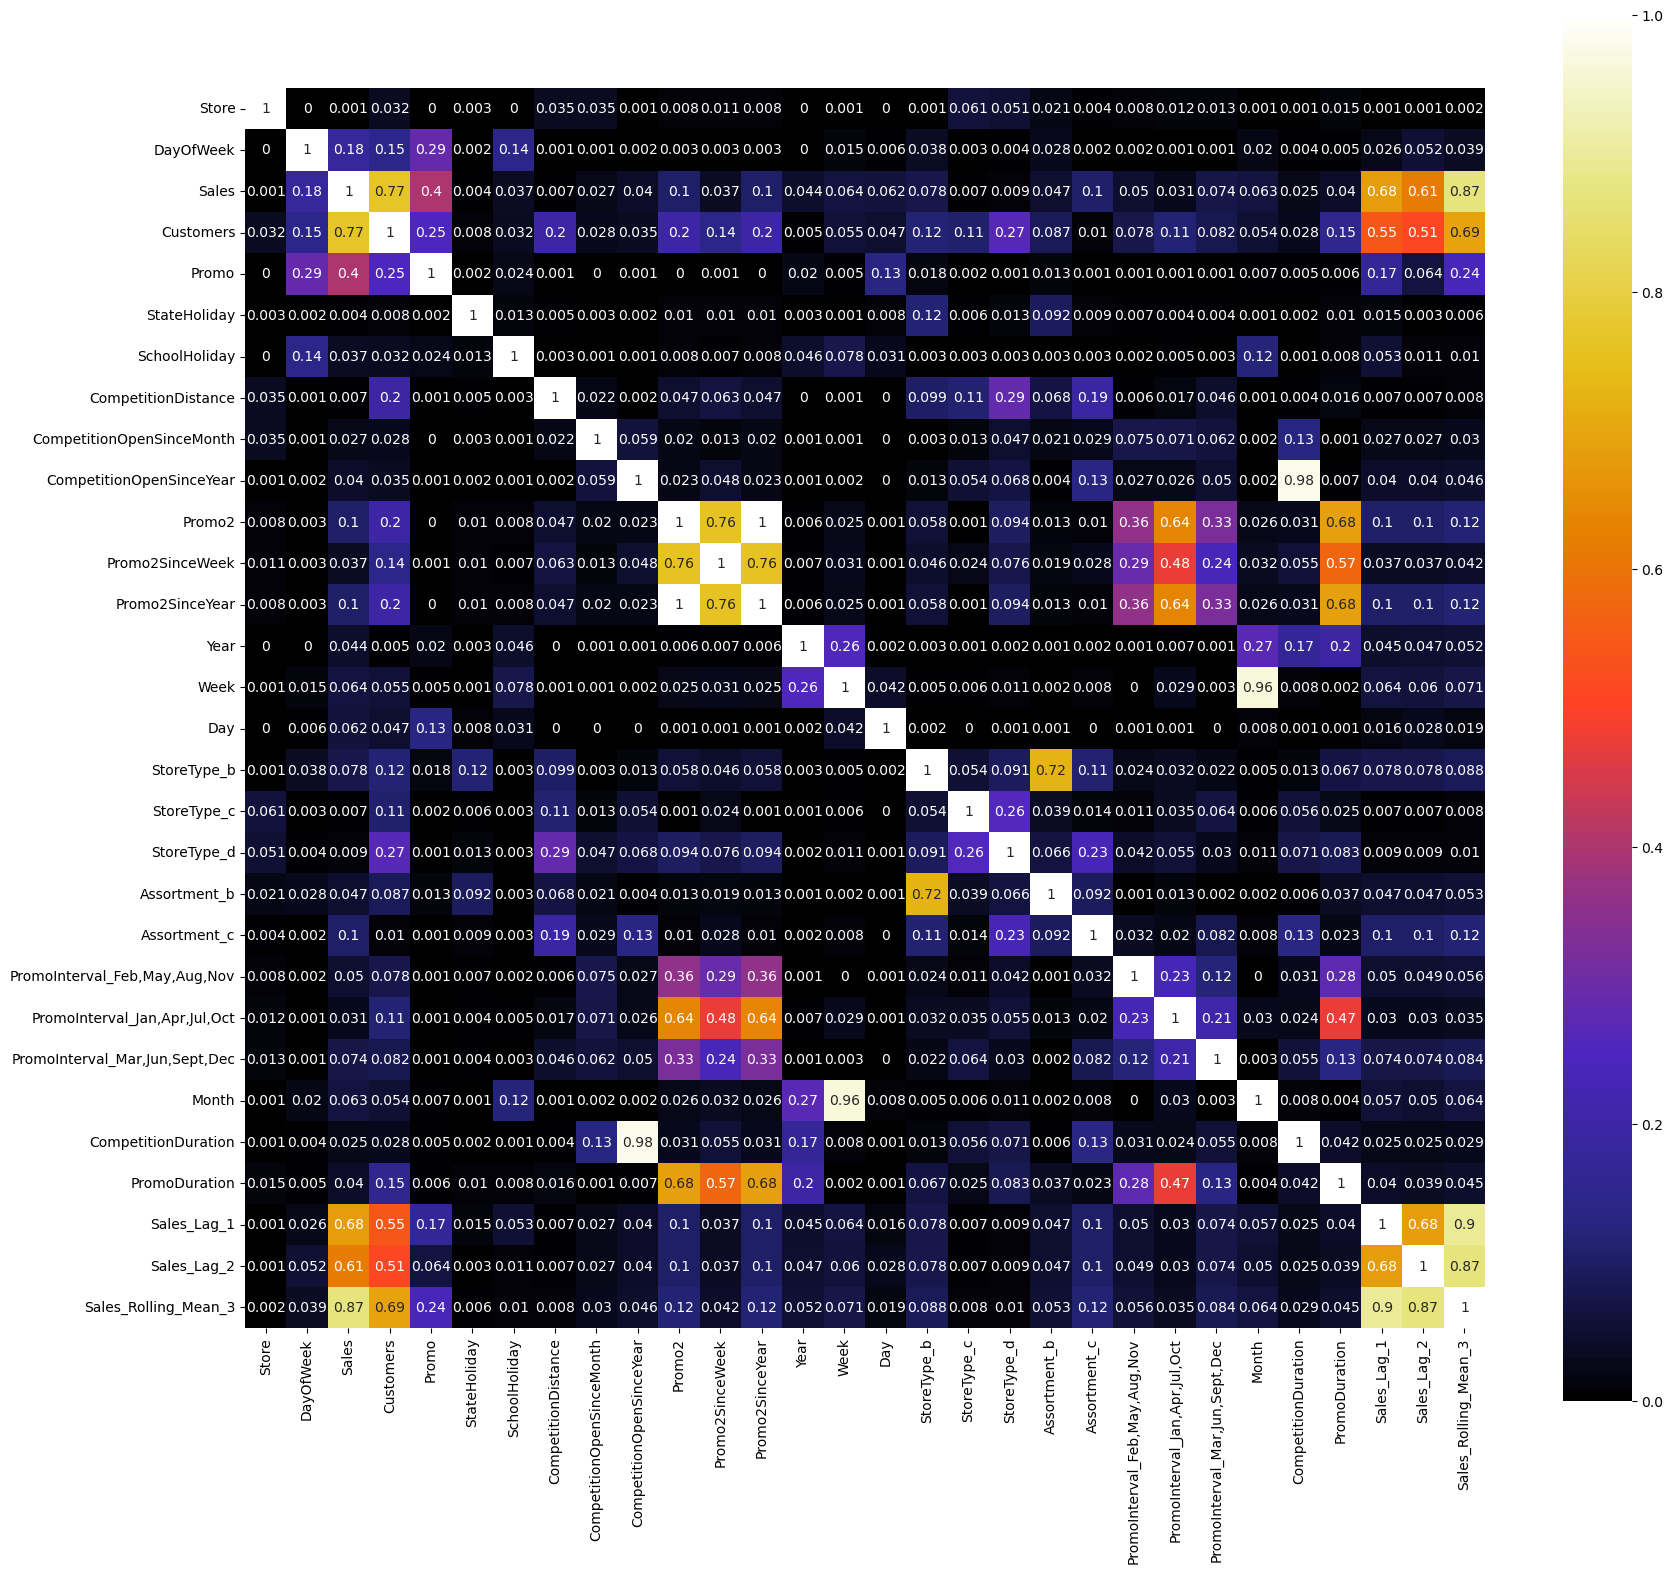

In [212]:
# Select your features wisely to avoid overfitting


plt.figure(figsize=(20,18))
sns.heatmap(abs(round(new_df.corr(),3)), annot=True, square=True, cmap=plt.cm.CMRmap)

In [213]:
corr = new_df.corr()

corr

C:\Users\Beaut\AppData\Local\Temp\ipykernel_7640\1684371303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = new_df.corr()


,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Month,CompetitionDuration,PromoDuration,Sales_Lag_1,Sales_Lag_2,Sales_Rolling_Mean_3
Store,1.000000,0.000351,0.001395,0.031895,-0.000012,0.002600,0.000472,-0.035297,-0.034684,0.001135,...,0.003604,0.007788,0.011703,-0.013336,0.001369,0.001170,-0.014710,0.001348,0.001325,0.001542
DayOfWeek,0.000351,1.000000,-0.182440,-0.147950,-0.291572,-0.001910,-0.142506,-0.001402,0.000543,0.002019,...,-0.001507,-0.002226,-0.001212,-0.001296,-0.020259,-0.003527,-0.005259,0.026256,0.052035,-0.039459
Sales,0.001395,-0.182440,1.000000,0.769436,0.402141,0.004486,0.037117,-0.007401,-0.026846,0.040421,...,0.103096,-0.049731,-0.030636,-0.074098,0.063045,-0.025125,-0.039993,0.682772,0.615281,0.870953
Customers,0.031895,-0.147950,0.769436,1.000000,0.253030,0.008054,0.031527,-0.197430,-0.028246,0.035321,...,-0.009946,-0.078065,-0.113615,-0.082077,0.054221,-0.028377,-0.154539,0.544935,0.512991,0.692568
Promo,-0.000012,-0.291572,0.402141,0.253030,1.000000,0.002266,0.024308,0.000684,-0.000365,-0.001010,...,0.000961,0.000712,-0.001324,0.000566,-0.007443,0.004675,0.005803,0.173502,0.064122,0.242451
StateHoliday,0.002600,-0.001910,0.004486,0.008054,0.002266,1.000000,0.012794,-0.004562,0.002710,0.002275,...,-0.009472,-0.007066,-0.004012,-0.003681,0.001272,-0.001985,-0.010008,0.015340,-0.003425,0.006215
SchoolHoliday,0.000472,-0.142506,0.037117,0.031527,0.024308,0.012794,1.000000,-0.002964,-0.000536,-0.000796,...,-0.002660,-0.001673,-0.005371,-0.002920,0.117555,-0.000641,-0.008111,-0.053267,-0.011202,-0.010367
CompetitionDistance,-0.035297,-0.001402,-0.007401,-0.197430,0.000684,-0.004562,-0.002964,1.000000,-0.021534,-0.002328,...,0.192080,-0.005897,-0.017275,-0.046459,0.000724,0.003504,0.016433,-0.007194,-0.007046,-0.008203
CompetitionOpenSinceMonth,-0.034684,0.000543,-0.026846,-0.028246,-0.000365,0.002710,-0.000536,-0.021534,1.000000,0.058807,...,0.028668,0.074807,-0.071050,0.062367,-0.001542,-0.126985,0.001460,-0.026813,-0.026732,-0.030469
CompetitionOpenSinceYear,0.001135,0.002019,0.040421,0.035321,-0.001010,0.002275,-0.000796,-0.002328,0.058807,1.000000,...,0.129930,0.026964,-0.026310,0.050334,0.001748,-0.977466,-0.006739,0.040413,0.040442,0.045965


In [250]:
# 2. Data Splitting
# Splitting the data based on the dates
train = new_df[new_df['Date'] <= '2015-06-19']
test = new_df[new_df['Date'] > '2015-06-19']

In [292]:
test.to_csv('test_final_reduced_data.csv', index =False)

In [251]:
unique_stores = new_df['Store'].unique()

# Randomly sample 10% of the stores
sampled_stores = np.random.choice(unique_stores, size=int(0.10 * len(unique_stores)),replace=False)

# Filter the dataset to only include data from the sampled stores
reduced_data = train[train['Store'].isin(sampled_stores)]

reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78966 entries, 2868 to 1008155
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Store                           78966 non-null  int64         
 1   DayOfWeek                       78966 non-null  int64         
 2   Date                            78966 non-null  datetime64[ns]
 3   Sales                           78966 non-null  int64         
 4   Customers                       78966 non-null  int64         
 5   Promo                           78966 non-null  int64         
 6   StateHoliday                    78966 non-null  int64         
 7   SchoolHoliday                   78966 non-null  int64         
 8   CompetitionDistance             78966 non-null  int64         
 9   CompetitionOpenSinceMonth       78966 non-null  int64         
 10  CompetitionOpenSinceYear        78966 non-null  int64         
 1

In [253]:
# Save the reduced dataset to a CSV file
#reduced_data.to_csv('final_reduced_data.csv', index=False)

In [254]:
# Creating a  New Dataframe which will be our final dataframe based on the correlation result
final_df = reduced_data[["Store","Month","Day","DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration","Sales","Sales_Lag_1","Sales_Lag_2","Sales_Rolling_Mean_3"]]

final_df.head()

,Store,Month,Day,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,StoreType_d,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec",Day,CompetitionDuration,Sales,Sales_Lag_1,Sales_Lag_2,Sales_Rolling_Mean_3
2868,4,6,19,5,1281,1,0,0,620,0,...,0,1,0,0,19,69,9686,9374,9118,9392
2869,4,6,18,4,1138,1,0,0,620,0,...,0,1,0,0,18,69,8880,9686,9374,9313
2870,4,6,17,3,1254,1,0,0,620,0,...,0,1,0,0,17,69,9685,8880,9686,9417
2871,4,6,16,2,1352,1,0,0,620,0,...,0,1,0,0,16,69,10671,9685,8880,9745
2872,4,6,15,1,1473,1,0,0,620,0,...,0,1,0,0,15,69,12398,10671,9685,10918


In [255]:
# Model development
# Separate target variable and features
X = final_df.drop(columns=['Sales'], axis=1)
y = final_df['Sales']

X.shape, y.shape

((78966, 21), (78966,))

In [256]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

In [257]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [258]:
#Check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63172, 21), (15794, 21), (63172,), (15794,))

In [259]:
# Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [260]:
# Model Building------ (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [261]:
# Model Predictions
y_pred= model.predict(X_test)


In [262]:
# Analyzing coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                Coefficient
Store                             -0.000145
Month                             -0.006672
Day                                0.000965
DayOfWeek                         -0.001855
Customers                         -0.007374
Promo                              0.006413
StateHoliday                       0.000806
SchoolHoliday                      0.002304
CompetitionDistance               -0.003163
Promo2                            -0.000246
StoreType_b                        0.003247
StoreType_c                       -0.003267
StoreType_d                       -0.005806
Assortment_c                       0.004680
PromoInterval_Feb,May,Aug,Nov     -0.004274
PromoInterval_Mar,Jun,Sept,Dec    -0.001687
Day                                0.000965
CompetitionDuration               -0.000010
Sales_Lag_1                    -2471.233711
Sales_Lag_2                    -2467.822829
Sales_Rolling_Mean_3            6537.654436


In [263]:
#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(mse)


print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"RMSE: {RMSE}")

Mean Absolute Error: 0.6736648406271507
Mean Squared Error: 0.6695851447918901
R-squared: 0.9999998919482487
RMSE: 0.8182818247962557


In [270]:
## Prophet
from prophet import Prophet
sales_df = reduced_data.copy()

In [337]:
sales_df = sales_df.rename(columns={'Date': 'ds', 'Sales': 'y'}).reset_index(drop=True)
sales_df = sales_df.sort_values('ds')
sales_df.tail(50)

,Store,DayOfWeek,ds,y,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Month,CompetitionDuration,PromoDuration,Sales_Lag_1,Sales_Lag_2,Sales_Rolling_Mean_3
78872,1022,5,2015-06-19,7647,785,1,0,0,1520,9,...,1,0,0,0,6,21,0,6245,5904,6598
78871,529,5,2015-06-19,9155,880,1,0,0,12920,9,...,1,0,0,0,6,33,0,6595,6922,7557
78870,91,5,2015-06-19,4519,425,1,0,0,2410,9,...,0,0,1,0,6,21,45,3558,3862,3979
78869,976,5,2015-06-19,7470,750,1,0,0,4180,9,...,0,0,0,0,6,21,0,4565,5908,5981
78868,36,5,2015-06-19,9326,1047,1,0,0,540,6,...,1,0,1,0,6,144,8,9916,9140,9460
78867,879,5,2015-06-19,4526,398,1,0,0,2325,9,...,0,1,0,0,6,21,28,3745,3032,3767
78878,298,5,2015-06-19,10452,803,1,0,0,6880,7,...,0,0,0,0,6,71,0,8389,7239,8693
78866,40,5,2015-06-19,4462,545,1,0,0,180,9,...,0,1,0,0,6,21,67,4532,3183,4059
78864,399,5,2015-06-19,6692,627,1,0,0,5360,9,...,0,0,1,0,6,33,44,4437,5067,5398
78863,951,5,2015-06-19,9859,826,1,0,0,710,9,...,1,0,1,0,6,21,44,7724,6691,8091


In [280]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

def sales_prediction_prophet(Store_ID, sales_df, periods, horizon="120 days"):
    sales_df = sales_df[sales_df['Store'] == Store_ID]

    # Initialize and train Prophet
    model = Prophet(daily_seasonality=True, yearly_seasonality=True)
    model.fit(sales_df)

    # Create future dataframe
    future = model.make_future_dataframe(periods=periods)  

    # Predict
    forecast = model.predict(future)
    
    # Plot the forecast
    fig = model.plot(forecast)
    fig2 = model.plot_components(forecast)

    # Cross-validation
    df_cv = cross_validation(model, initial='660 days', period='30 days', horizon=horizon)

    # Calculate performance metrics
    df_p = performance_metrics(df_cv)
    print(df_p[['horizon', 'mape']].head())
    
    # Calculate and print accuracy in terms of MAPE
    mape = df_p['mape'].mean() * 100
    accuracy = 100 - mape
    print(f"Accuracy (in terms of MAPE): {accuracy:.2f}%")

    #plot the cross-validation forecast performance
    fig3 = plot_cross_validation_metric(df_cv, metric='mape')


20:39:08 - cmdstanpy - INFO - Chain [1] start processing
20:39:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

20:39:09 - cmdstanpy - INFO - Chain [1] start processing
20:39:09 - cmdstanpy - INFO - Chain [1] done processing
20:39:10 - cmdstanpy - INFO - Chain [1] start processing
20:39:10 - cmdstanpy - INFO - Chain [1] done processing
20:39:10 - cmdstanpy - INFO - Chain [1] start processing
20:39:10 - cmdstanpy - INFO - Chain [1] done processing
20:39:10 - cmdstanpy - INFO - Chain [1] start processing
20:39:10 - cmdstanpy - INFO - Chain [1] done processing


  horizon      mape
0 12 days  0.104087
1 13 days  0.108503
2 14 days  0.111005
3 15 days  0.108300
4 16 days  0.105025
Accuracy (in terms of MAPE): 89.31%


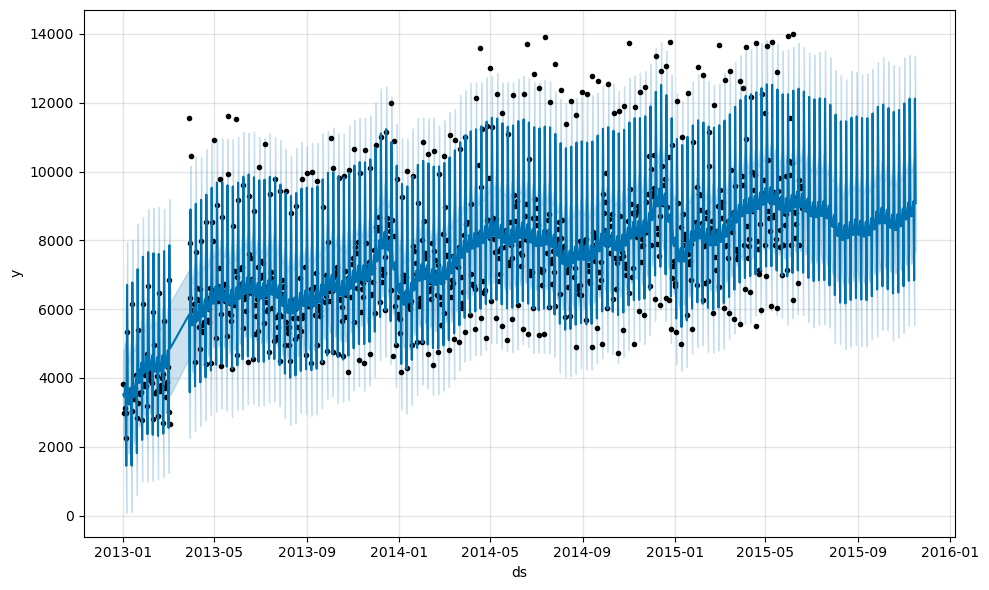

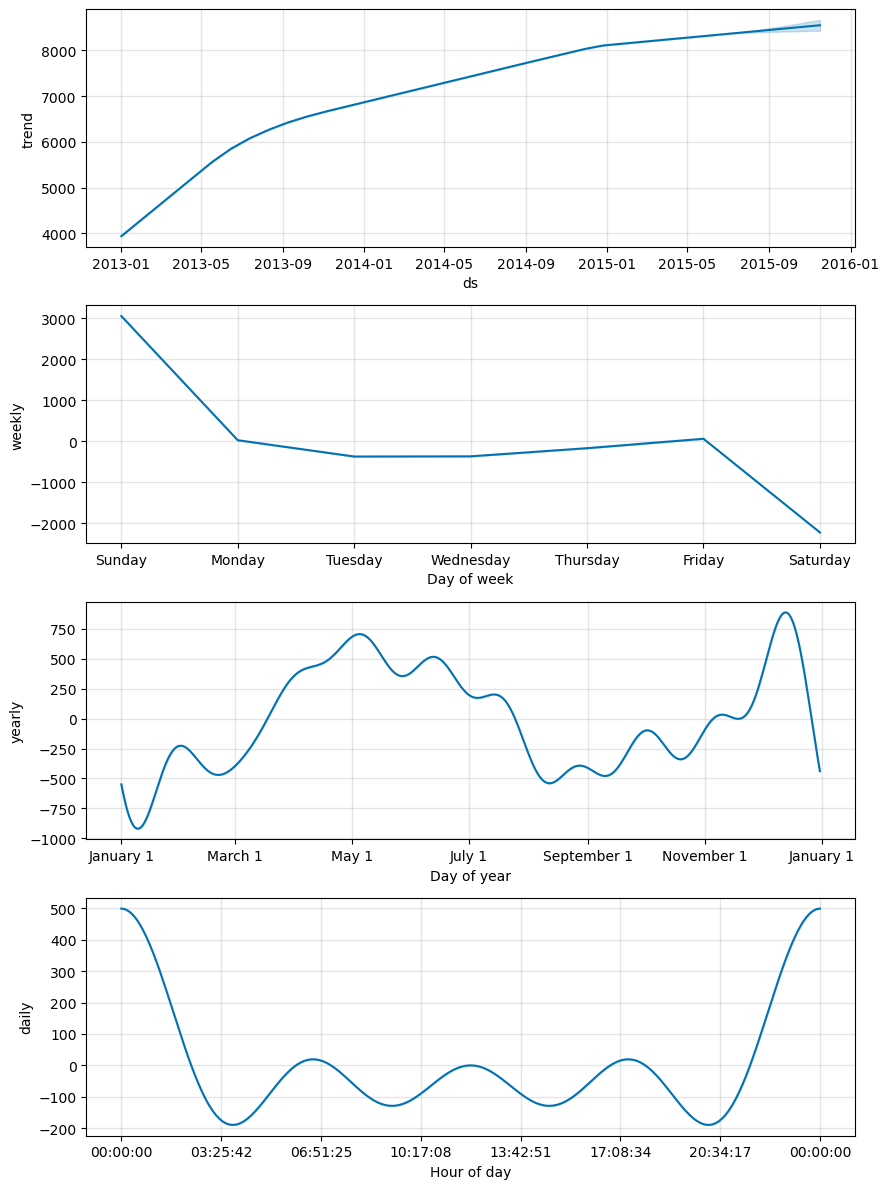

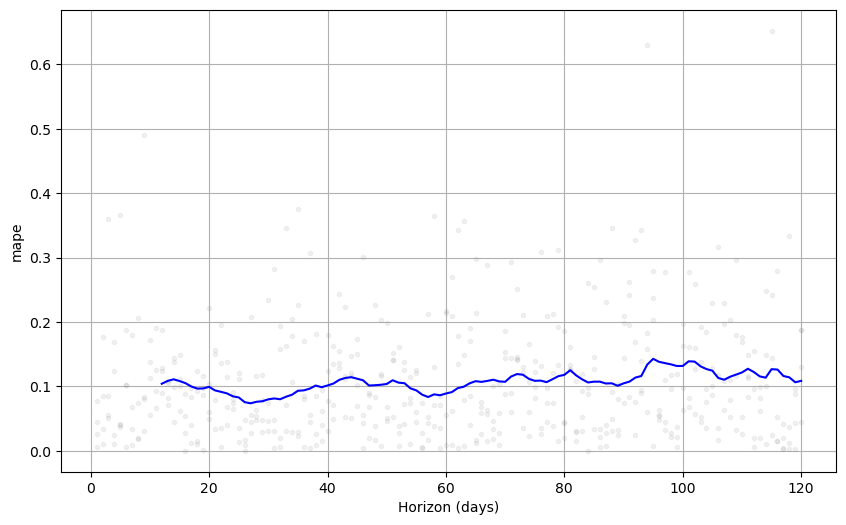

In [281]:
sales_prediction_prophet(676, sales_df, 150)

11:07:34 - cmdstanpy - INFO - Chain [1] start processing
11:07:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

11:07:55 - cmdstanpy - INFO - Chain [1] start processing
11:07:55 - cmdstanpy - INFO - Chain [1] done processing
11:07:55 - cmdstanpy - INFO - Chain [1] start processing
11:07:55 - cmdstanpy - INFO - Chain [1] done processing
11:07:55 - cmdstanpy - INFO - Chain [1] start processing
11:07:55 - cmdstanpy - INFO - Chain [1] done processing
11:07:56 - cmdstanpy - INFO - Chain [1] start processing
11:07:56 - cmdstanpy - INFO - Chain [1] done processing


  horizon      mape
0 13 days  0.160479
1 14 days  0.153540
2 15 days  0.126442
3 16 days  0.114868
4 17 days  0.112160
Accuracy (in terms of MAPE): 85.36%


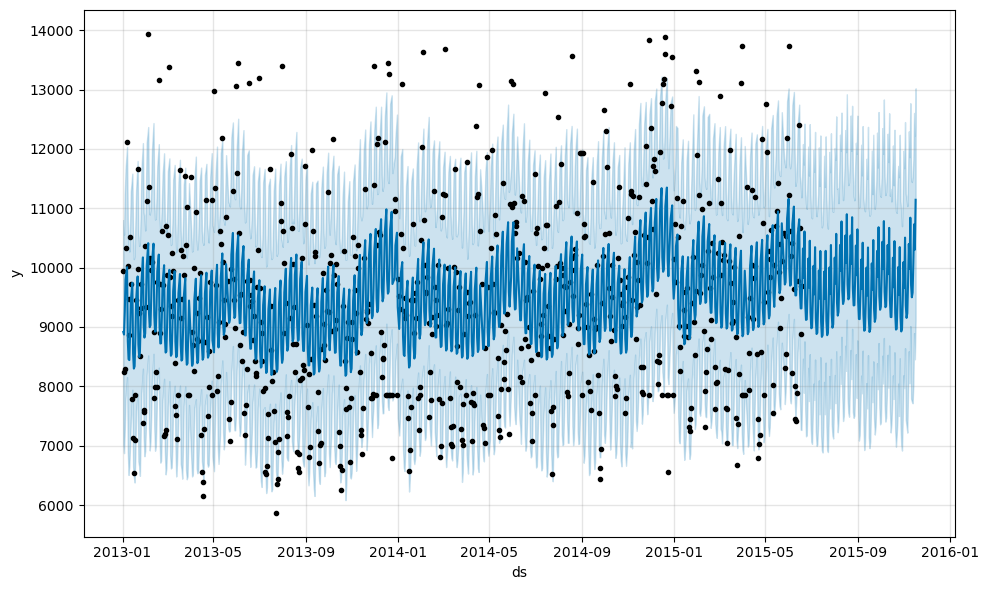

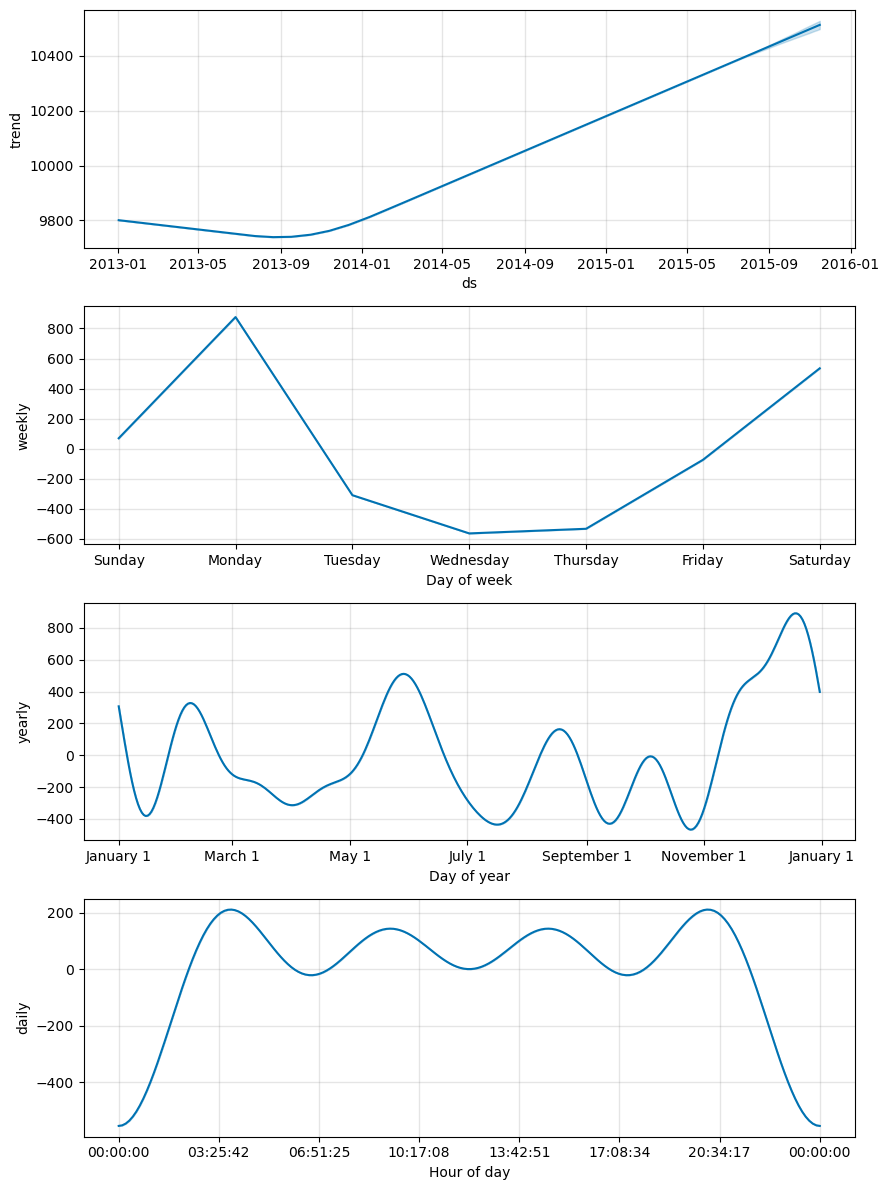

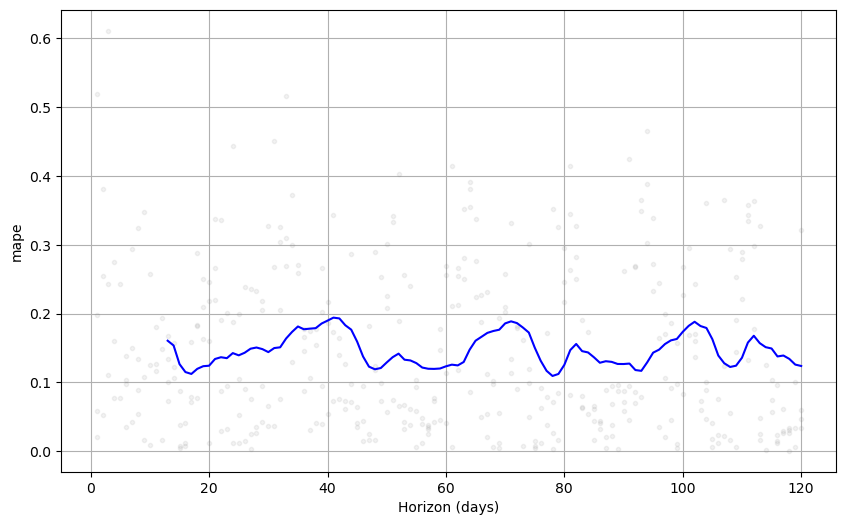

In [324]:
sales_prediction_prophet(4, sales_df, 150)

### LSTM

In [283]:


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [293]:
test_df = pd.read_csv('test_final_reduced_data.csv')

In [298]:
sales_df = sales_df.rename(columns={'ds': 'Date', 'y': 'Sales'})


In [299]:
#Define the function for MAPE metric
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [302]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def sales_prediction_LSTM(Store_ID, sales_df, test_df, epochs=10):
    # Filter the sales data for the given store
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    test_df = test_df[test_df['Store'] == Store_ID]

    # Extract the sales values for preprocessing
    train_values = sales_df['Sales'].values.reshape(-1, 1)
    test_values = test_df['Sales'].values.reshape(-1, 1)

    # Use MinMaxScaler to scale data to the range [0, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_values)
    
    # Prepare data in the form [samples, time steps, features]
    X_train, y_train = [], []
    for i in range(30, len(train_scaled)): # using a window of 30 days
        X_train.append(train_scaled[i-30:i, 0])
        y_train.append(train_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Design the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=32)

    # Prepare test data
    dataset_total = pd.concat((sales_df['Sales'], test_df['Sales']), axis=0)
    inputs = dataset_total[len(dataset_total) - len(test_df) - 30:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    # Prepare test data in the form [samples, time steps, features]
    X_test = []
    for i in range(30, len(test_df)+30):
        X_test.append(inputs[i-30:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Predict using the LSTM model
    predicted_sales = model.predict(X_test)
    predicted_sales = scaler.inverse_transform(predicted_sales)

    # Calculate performance metrics
    y_true = test_df['Sales'].values
    y_pred = predicted_sales

    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 100 - MAPE

    print(f"Mean Absolute Error (MAE) for Store {Store_ID}: {MAE}")
    print(f"Mean Squared Error (MSE) for Store {Store_ID}: {MSE}")
    print(f"Root Mean Squared Error (RMSE) for Store {Store_ID}: {RMSE}")
    print(f"R2 Score for Store {Store_ID}: {R2}")
    print(f"Mean Absolute Percentage Error (MAPE) for Store {Store_ID}: {MAPE:.2f}%")
    print(f"Accuracy (in terms of MAPE) for Store {Store_ID}: {accuracy:.2f}%")

    # Return the model and the predictions (for further usage if required)
    return model, predicted_sales


In [303]:
model, preds = sales_prediction_LSTM(676, sales_df, test_df, epochs=10)



Epoch 1/10
27/27 [==============================] - 6s 22ms/step - loss: 0.0418
Epoch 2/10
27/27 [==============================] - 1s 24ms/step - loss: 0.0254
Epoch 3/10
27/27 [==============================] - 1s 21ms/step - loss: 0.0249
Epoch 4/10
27/27 [==============================] - 1s 21ms/step - loss: 0.0256
Epoch 5/10
27/27 [==============================] - 1s 20ms/step - loss: 0.0254
Epoch 6/10
27/27 [==============================] - 1s 23ms/step - loss: 0.0253
Epoch 7/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0257
Epoch 8/10
27/27 [==============================] - 1s 21ms/step - loss: 0.0255
Epoch 9/10
27/27 [==============================] - 1s 21ms/step - loss: 0.0248
Epoch 10/10
2/2 [==============================] - 1s 10ms/step
Mean Absolute Error (MAE) for Store 676: 1620.5397827148438
Mean Squared Error (MSE) for Store 676: 5243781.755848986
Root Mean Squared Error (RMSE) for Store 676: 2289.9305133232724
R2 Score for Store 676: -0.242614

In [308]:
#Save the model
model, preds = sales_prediction_LSTM(676, sales_df, test_df, epochs=10)

model.save('lstm_model.h5')

Epoch 1/10
27/27 [==============================] - 5s 20ms/step - loss: 0.0487
Epoch 2/10
27/27 [==============================] - 1s 21ms/step - loss: 0.0256
Epoch 3/10
27/27 [==============================] - 1s 20ms/step - loss: 0.0250
Epoch 4/10
27/27 [==============================] - 1s 21ms/step - loss: 0.0251
Epoch 5/10
27/27 [==============================] - 1s 19ms/step - loss: 0.0249
Epoch 6/10
27/27 [==============================] - 1s 23ms/step - loss: 0.0257
Epoch 7/10
27/27 [==============================] - 1s 21ms/step - loss: 0.0249
Epoch 8/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0257
Epoch 9/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0256
Epoch 10/10
2/2 [==============================] - 1s 20ms/step
Mean Absolute Error (MAE) for Store 676: 1558.1465576171875
Mean Squared Error (MSE) for Store 676: 4820022.038634276
Root Mean Squared Error (RMSE) for Store 676: 2195.454859165698
R2 Score for Store 676: -0.1421963

C:\Users\Beaut\anaconda3\envs\bootcamp\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
##Updated_LSTM

In [314]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [315]:
def create_dataset(dataset, look_back=1):
    """
    Converts a time series dataset into a supervised learning dataset.
    """
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [318]:
from sklearn.model_selection import train_test_split


def sales_prediction_LSTM_updated(Store_ID, sales_df, test_df, epochs=50, batch_size=20):

    # Filter by Store ID
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    
    # Splitting the dataset into train and validation sets
    train_df, val_df = train_test_split(sales_df, test_size=0.2, shuffle=False)
    
    # Extract sales values for preprocessing
    train_values = train_df['Sales'].values.reshape(-1, 1)
    val_values = val_df['Sales'].values.reshape(-1, 1)
    test_values = test_df['Sales'].values.reshape(-1, 1)
    
    # Scale data to range [0, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_values)
    val_scaled = scaler.transform(val_values)
    test_scaled = scaler.transform(test_values)
    
    # Preprocess data for LSTM
    X_train, y_train = create_dataset(train_scaled, 30)
    X_val, y_val = create_dataset(val_scaled, 30)
    X_test, y_test = create_dataset(test_scaled, 30)
    
    # Reshape data to fit LSTM input
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Define LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)
    
    # Making predictions
    predicted_sales = model.predict(X_test)
    predicted_sales = scaler.inverse_transform(predicted_sales).reshape(-1)
    
    # Compute evaluation metrics
    MAE = mean_absolute_error(test_df['Sales'].iloc[30:].values, predicted_sales)
    MSE = mean_squared_error(test_df['Sales'].iloc[30:].values, predicted_sales)
    RMSE = np.sqrt(MSE)
    r2 = r2_score(test_df['Sales'].iloc[30:].values, predicted_sales)
    MAPE = np.mean(np.abs((test_df['Sales'].iloc[30:].values - predicted_sales) / test_df['Sales'].iloc[30:].values)) * 100
    accuracy = 100 - MAPE
    
    # Print evaluation metrics
    print(f"Mean Absolute Error (MAE) for Store {Store_ID}: {MAE}")
    print(f"Mean Squared Error (MSE) for Store {Store_ID}: {MSE}")
    print(f"Root Mean Squared Error (RMSE) for Store {Store_ID}: {RMSE}")
    print(f"R2 Score for Store {Store_ID}: {r2}")
    print(f"Mean Absolute Percentage Error (MAPE) for Store {Store_ID}: {MAPE:.2f}%")
    print(f"Accuracy (in terms of MAPE) for Store {Store_ID}: {accuracy:.2f}%")
    
    return model, predicted_sales

In [319]:
model, preds = sales_prediction_LSTM_updated(676, sales_df, test_df, epochs=10)

Epoch 1/10
34/34 [==============================] - 6s 51ms/step - loss: 0.0499 - val_loss: 0.0291
Epoch 2/10
34/34 [==============================] - 1s 22ms/step - loss: 0.0276 - val_loss: 0.0387
Epoch 3/10
34/34 [==============================] - 1s 22ms/step - loss: 0.0269 - val_loss: 0.0288
Epoch 4/10
34/34 [==============================] - 1s 24ms/step - loss: 0.0273 - val_loss: 0.0388
Epoch 5/10
34/34 [==============================] - 1s 22ms/step - loss: 0.0278 - val_loss: 0.0293
Epoch 6/10
34/34 [==============================] - 1s 21ms/step - loss: 0.0266 - val_loss: 0.0320
Epoch 7/10
34/34 [==============================] - 1s 22ms/step - loss: 0.0257 - val_loss: 0.0309
Epoch 8/10
34/34 [==============================] - 1s 21ms/step - loss: 0.0265 - val_loss: 0.0301
Epoch 9/10
34/34 [==============================] - 1s 22ms/step - loss: 0.0253 - val_loss: 0.0326
Epoch 10/10
1189/1189 [==============================] - 11s 9ms/step
Mean Absolute Error (MAE) for Store 676